In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797L, 64L)
(1797L,)


In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 7)
N_test, _ = X_test.shape

from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

y_test_pred = lda_model.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [5]:
np.mean(y_test != y_test_pred)

0.05387205387205387

In [6]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(y_test, y_test_pred)

[[62  0  0  0  0  0  1  0  0  0]
 [ 0 52  0  0  0  0  0  0  2  3]
 [ 0  0 56  1  0  0  0  0  0  0]
 [ 0  0  0 55  0  2  0  0  0  0]
 [ 0  1  0  0 60  0  0  2  0  1]
 [ 0  0  0  0  0 50  0  0  0  1]
 [ 0  1  0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0  0  0 57  0  1]
 [ 0  6  1  0  0  0  0  1 60  1]
 [ 0  1  0  1  0  2  0  1  2 55]]


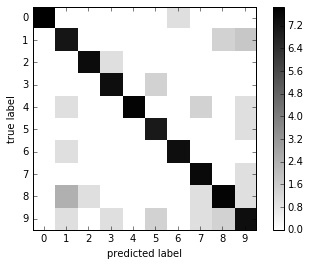

In [7]:
M = confusion_matrix(y_test, y_test_pred)
#M = M - np.diag(np.diag(M))
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.grid(False)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()

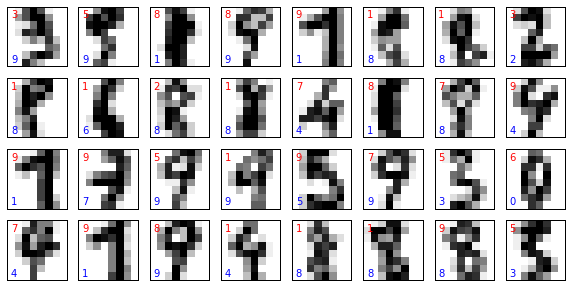

In [8]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

plt.figure(figsize = (10, 10)) # Размер окна в дюймах
i_subplot = 1 
for i in range(N_test):
    yi_test_pred = lda_model.predict(X_test[i:(i + 1), :])[0]
    if yi_test_pred != y_test[i]:
        plt.subplot(8, 8, i_subplot)
        i_subplot += 1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.reshape(X_test[i, :], (8, 8)), cmap = plt.cm.binary, 
                   interpolation = 'nearest')
        plt.text(0, 7, str(y_test[i]),    color = 'b')        
        plt.text(0, 1, str(yi_test_pred), color = 'r')

## Квадратичный дискриминантный анализ

In [9]:
qda_model = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

y_test_pred = qda_model.predict(X_test)

np.mean(y_test != y_test_pred)

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.12794612794612795

In [10]:
print confusion_matrix(y_test, y_test_pred)

[[44  1  0  0  8 10  0  0  0  0]
 [ 0 53  0  0  1  0  0  1  2  0]
 [ 0  2 44  1  0  0  0  0 10  0]
 [ 0  0  0 49  0  0  0  0  4  4]
 [ 0  0  0  0 57  0  1  5  1  0]
 [ 0  0  0  1  0 50  0  0  0  0]
 [ 0  1  0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0  0  0 58  0  0]
 [ 0  2  1  1  1  1  0  2 59  2]
 [ 0  0  0  3  1  4  0  5  0 49]]


## Плюсы и минусы метода LDA и QDA

**Плюсы**

* Простые методы
* Показывают хорошие результаты, когда данные имеют нормальное распределение или близки к нему
* Достаточно устойчивы к выбросам 
* Можно использовать для понижения размерности

**Минусы**

* Показывают плохие результаты, когда разделяющие поверхности слишком сложные
* Работают только с числовыми признаками
* Нет естественного способа обработки пропущенных значений
* Чувствительны к масштабированию